# Exploration of berries prices in the spanish market

## Prices exploration

### Cleanance

In [1]:
import pyodbc
import pandas as pd
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
connStr = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=bipro02\\adminbi;DATABASE=Prices;Trusted_Connection=yes')
cursor = connStr.cursor()

qry = "SELECT * FROM [Prices].[dbo].[prices] where cast([Country] as nvarchar) = cast('ES' as nvarchar)"
df_prices = pd.read_sql(qry, connStr)

df_prices.shape

(447, 11)

In [2]:
# Dates in campaign time format
# df_prices['Campaign_Date'] = df_prices['Year_campaign'].astype(str) + df_prices['Week_num_campaign'].astype(str)
# https://stackoverflow.com/questions/17087314/get-date-from-week-number
# df_prices['Campaign_Date'] = df_prices['Campaign_Date'].apply(lambda x: datetime.datetime.strptime(x + '-1', "%Y%W-%w"))

# Dates natural date format
blue = df_prices[(df_prices.Product=='BLUEBERRIES') & (df_prices.Year_campaign>2015) & (df_prices.Week_num_campaign<50)][['Date_ref', 'Price']]
blue.set_index('Date_ref',inplace=True)
blue.sort_index(inplace=True)
blue.index = blue.index.astype('datetime64[ns]') 
blue_weeks = blue.resample('W').mean().asfreq('W')
rows_null = blue_weeks.isnull()
idx_null = rows_null[rows_null.any(axis=1)].index
blue_full = blue_weeks.interpolate()


### Ploting

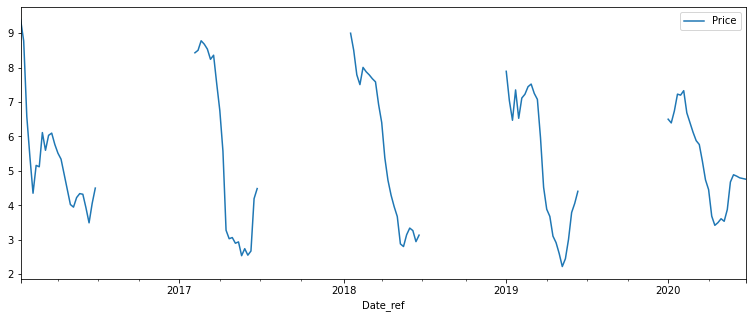

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting blue_weeks, without interpolation as it is our real data
fig, ax = plt.subplots(figsize= (13,5))
blue_weeks.plot(ax=ax);

In [4]:
# Correlation between related campaign weeks
for y in range(2017,2020):
    c = blue[blue.index.year==y]['Price'].reset_index()['Price'][0:21].corr(blue[blue.index.year==y+1].reset_index()['Price'][0:21])
    print(f'Correlations between campaigns {y} and {y+1}: {c}')

Correlations between campaigns 2017 and 2018: 0.8956249612699594
Correlations between campaigns 2018 and 2019: 0.964328735988804
Correlations between campaigns 2019 and 2020: 0.9157860350396017


### ACF correlation function

In [5]:
from statsmodels.tsa.stattools import acf
acf(blue)

array([ 1.        ,  0.86104549,  0.69186141,  0.50789583,  0.31865133,
        0.14438902, -0.04818119, -0.23434428, -0.41264613, -0.56581256,
       -0.67487525, -0.73442129, -0.71906835, -0.63802788, -0.52902053,
       -0.39317501, -0.23287666, -0.05615846,  0.13414854,  0.30331095,
        0.42608891,  0.51847942,  0.56344551,  0.60853751,  0.60121845,
        0.56228992,  0.4640867 ,  0.33882347,  0.20524073,  0.05949822,
       -0.0811932 , -0.20598205, -0.32455124, -0.42532552, -0.51070107,
       -0.54084048, -0.50774011, -0.44443095, -0.36043758, -0.25592986,
       -0.15475514])

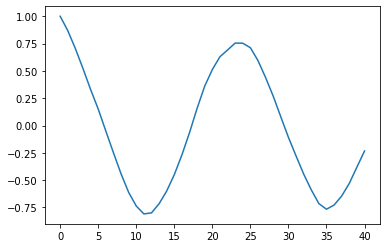

In [6]:
plt.plot(acf(blue,unbiased=True))

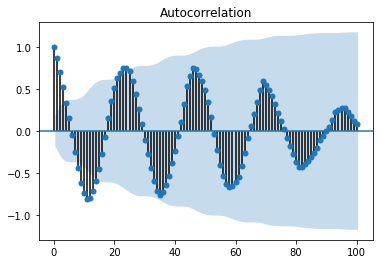

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(blue,lags=100,unbiased=True);

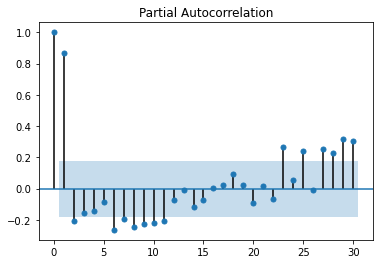

In [8]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(blue, lags = 30);

## Volumes exploration

## Cleanance

In [74]:
import pyodbc
import pandas as pd
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
connStr = pyodbc.connect('DRIVER={ODBC Driver 13 for SQL Server};SERVER=bipro02\\adminbi;DATABASE=Prices;Trusted_Connection=yes')
cursor = connStr.cursor()

qry = "SELECT * FROM [Prices].[dbo].[volumes]"
df_volumes = pd.read_sql(qry, connStr)

In [75]:
df_volumes.head()

,Product,Volume,Country,Measure,Date_ref,Week_desc,Week_num,Year_num
0,BLUEBERRIES,0.0,CHILE,KG,2016-06-06,23-2016,23,2016
1,BLUEBERRIES,0.0,MOROCCO,KG,2016-11-21,47-2016,47,2016
2,BLUEBERRIES,0.0,POLAND,KG,2016-05-02,18-2016,18,2016
3,BLUEBERRIES,0.0,PORTUGAL,KG,2016-10-17,42-2016,42,2016
4,BLUEBERRIES,0.0,SOUTHAFRICA,KG,2016-03-28,13-2016,13,2016


In [76]:
df_volumes.shape

(2915, 8)

In [77]:
df_volumes[df_volumes['Volume']!=0].shape

(955, 8)

## Spanish example

In [78]:
df_volumes_es = df_volumes[df_volumes['Country']=='SPAIN']
df_volumes_es = df_volumes_es[['Date_ref','Volume']]
df_volumes_es.set_index('Date_ref',inplace=True)
df_volumes_es.sort_index(inplace=True)
df_volumes_es.index = df_volumes_es.index.astype('datetime64[ns]') 
df_volumes_es.head()

,Volume
Date_ref,
2015-12-28,0.0
2016-01-04,0.0
2016-01-11,0.0
2016-01-18,0.0
2016-01-25,0.0


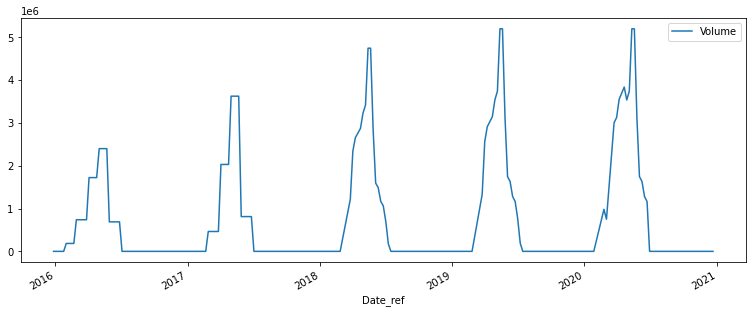

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting blue_weeks, without interpolation as it is our real data
fig, ax = plt.subplots(figsize= (13,5))
df_volumes_es.plot(ax=ax);import numpy as np

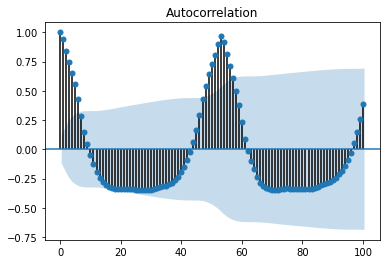

In [80]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_volumes_es,lags=100,unbiased=True);

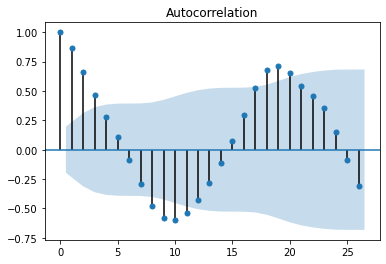

In [81]:
from statsmodels.graphics.tsaplots import plot_acf
df_volumes_es_nozero = df_volumes_es.drop(df_volumes_es[df_volumes_es['Volume']==0].index)
plot_acf(df_volumes_es_nozero,lags=26,unbiased=True);

## All countries example

In [84]:
df_volumes_total = df_volumes[['Date_ref','Volume']].groupby('Date_ref').agg('sum')
#df_volumes_total.set_index('Date_ref',inplace=True)
#df_volumes_total.sort_index(inplace=True)
df_volumes_total.index = df_volumes_total.index.astype('datetime64[ns]') 
df_volumes_total.head()

,Volume
Date_ref,
2015-12-28,0.0
2016-01-04,0.0
2016-01-11,0.0
2016-01-18,0.0
2016-01-25,0.0


In [85]:
df_volumes_total.head()

,Volume
Date_ref,
2015-12-28,0.0
2016-01-04,0.0
2016-01-11,0.0
2016-01-18,0.0
2016-01-25,0.0


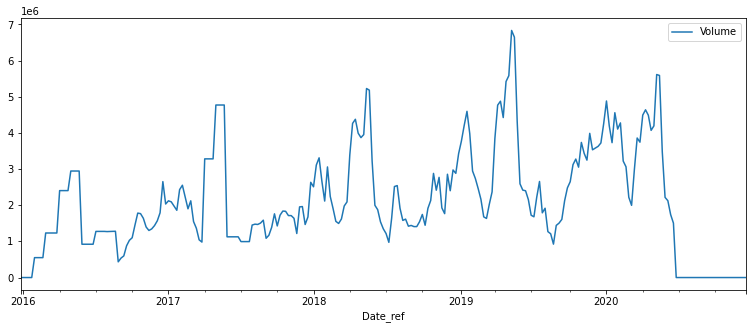

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting blue_weeks, without interpolation as it is our real data
fig, ax = plt.subplots(figsize= (13,5))
df_volumes_total.plot(ax=ax);import numpy as np

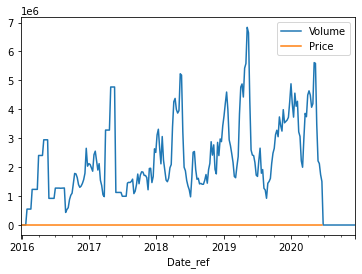

In [88]:
ax = df_volumes_total.plot()
blue_weeks.plot(ax=ax)

In [109]:
df_volumes_total[(df_volumes_total.index.year>2015) & (df_volumes_total.index.year<2020)][0:208]

,Volume
Date_ref,
2016-01-04,0.0
2016-01-11,0.0
2016-01-18,0.0
2016-01-25,0.0
2016-02-01,550500.0
...,...
2019-11-25,3988000.0
2019-12-02,3533000.0
2019-12-09,3580000.0


Text(0, 0.5, 'lifeExp')

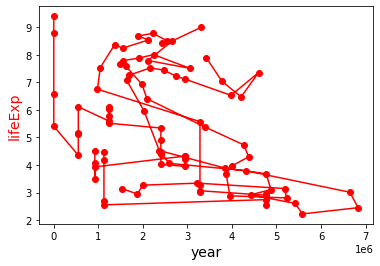

In [110]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_volumes_total[(df_volumes_total.index.year>2015) & (df_volumes_total.index.year<2020)][0:208], blue_weeks[(blue_weeks.index.year>2015) & (blue_weeks.index.year<2020)], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("lifeExp",color="red",fontsize=14)

In [115]:
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_volumes_total[(df_volumes_total.index.year>2015) & (df_volumes_total.index.year<2020)][0:208],df_volumes_total[(df_volumes_total.index.year>2015) & (df_volumes_total.index.year<2020)][0:208]['Volume'],color="blue",marker="o")
ax2.set_ylabel("gdpPercap",color="blue",fontsize=14)
plt.show();